**To make the assignment, first run the code below to import the right libraries.**

In [2]:
# =================================
# Imports
# =================================
from PyCh import *
from numpy import random
from dataclasses import dataclass
from matplotlib import pyplot
import math

#extra imports
import pandas as pd
import requests
import matplotlib.pyplot as plt
import statistics

<h1><center> 4DC10. Intermediate assignment</center></h1>
<h2><center> Modeling and simulation of an autonomous vehicle storage and retrieval system</center></h2>
    
# 1 Subject

Today's competitive environment, in which deliveries need to be faster and order sizes become smaller, forces material handling providers to progressively develop new and better solutions. A recent development in automated material-handling technology for unit load storage and retrieval is the autonomous vehicle storage and retrieval system (AVS/RS). Figure 1 shows a representation of an AVS/RS for the handling of totes, while Figure 2 illustrates a single tier (floor, level). The storage racks are single-deep and double-sided. Each storage position is of the same size and can hold one tote. Lifts are mounted at fixed locations at one end of each storage aisle. The input/output (I/O) point is located at the first tier beside each lift. Autonomous vehicles are dedicated to a storage aisle within a specific tier (so-called tier-captive configuration). The first position on either side of the storage aisle in all tiers serves as a buffer and is used to manage the transfer of totes between vehicles and lifts (see Figure 2). One buffer (out) handles totes which have been retrieved, the other one (in), located on the other side of the storage aisle, handles the totes to be stored. The presence of these buffers allows the lift and vehicle to work independently of each other. 

The throughput performance of AVS/RS systems can be affected by design decisions (such as number of tiers, number of aisles, and depth of aisles) as well as operational decisions (such as tote storage location and order assignment).

Figure 1: AVS/RS with tier-captive configuration [1] | Figure 2: Single tier in AVS/RS [1]
- | - 
<img src="figures/avs.png" alt="drawing" width="400"/> | <img src="figures/avrs2.png" alt="drawing" width="400"/>




# 2 Goal
The goal of this assignment is to study this new material handling solution by using computer simulation. This study can be restricted to the retrieval process only, i.e., the vehicles perform only single retrieval cycles. Clearly, the retrieval phase is the most critical activity from an organisational viewpoint, as it is directly related to customer service level and &mdash; in contrast to the storage phase &mdash; it cannot be postponed to a period of low workload. 

The objectives of this assignment can be summarized as follows:
- Develop a simulation model of one aisle that consists of Level tiers with retrieval process to assess the system performance in terms of throughput and flow time.
- Systematically develop the model process by process, and verify and validate each process using analytical results.
- Investigate design trade-offs, i.e., via different layouts (number of columns and tiers), for this material handling system.

# 3 Description of the AVS/RS
The AVS/RS is a fully automated system that can store and retrieve unit loads. The unit loads are placed in totes, a type of box, and these totes are placed in a designated aisle and column for storage. When retrieved, an autonomous vehicle places the totes in a buffer at the end of the aisle. There is one autonomous vehicle for every aisle within the tier. This is called the tier-captive configuration. From the buffer, the totes are picked by a lift that serves all tiers inone aisle, see Figure 2. In this assignment only one aisle that consists of `Level` tiers has to be modelled. Each aisle has depth number of columns of width `dv` metres and height `dl` metres.

Requests for a tote arrive for each tier, asking for a tote with a random (uniformly distributed) column assigned to it. The inter arrival time of requests is exponentially distributed with mean value `arrive`.

The vehicles transport totes along the aisle (one vehicle per tier). The time taken by the vehicle to process an order depends on the tote's location. The vehicle has to travel to this location, load the tote (it takes a fixed amount of time equal to `lv` seconds), then go back to the end of the aisle and, finally, unload the tote to the buffer (again this takes `lv` seconds). The speed profile of each vehicle is described as follows. First, the vehicle goes with a constant acceleration `av` *m/s$^2$* until it reaches its maximum velocity `vmaxv`, then it moves with this velocity and decelerates with a constant deceleration `av` to approach its destination point. If the tote is located too close to the end of the aisle, it is possible that the vehicle will not reach its maximum speed.

The vehicles unload the totes to a location where it is picked up by the lift. At any given time only one tote per tier is allowed to occupy such a position.

The lift transports the totes from every tier to the ground floor. The processing time depends on the tote's location and the fixed time to load and unload the tote (`ll` seconds for loading and `ll` seconds for unloading). The maximum speed of the lift is `vmaxl` *m/s* with a speed profile similar to that of the vehicles (constant acceleration/deceleration of `al` *m/s<sup>2</sup>*).

# 4 Modeling of the AVS/RS
The model consists of several processes communicating via channels, see Figure 3.

| Figure 3: The processes in the model | 
- 
<img src="figures/avrs.png" alt="drawing" width="400"/> 

A brief description of the processes is given below:
- **G:** The generator models the arrival of orders for totes. There is one generator per tier.
- **DB:** The demand buffer stores the orders to be picked up by the vehicles. The vehicle processes the orders under first-come-first-serve policy. It can always receive a tote, but it releases a tote only when the vehicle is ready to pick it up.
- **V:** The vehicle can be modeled as a server with a variable processing time.
- **GDV:** The process consisting of a Generator, Demand Buffer and Vehicle for one tier of the AVS/RS system.
- **B:** The buffer stores the totes from the vehicles awaiting for a pick-up by the lift. The buffer operates under first-come-first-serve policy and has a finite capacity of `bc` totes per tier. So, every tier has a buffer location of finite capacity of `bc` totes. All those locations together form the buffer B that accommodates all the totes which are processed by the same lift. When the buffer is not empty (there is at least one tote on one of the tiers), the buffer sends information about the tier of the longest waiting tote to the lift upon request. This information is used by the lift to determine the location of the tote (the number of the tier the tote is located in). Once the lift is ready to pick it up, the tote is released to the lift. There are two types of queues in the buffer: `xs` contains all the totes to be picked up by the lift and there are Level counters `n` counting the totes from the corresponding tier.
- **L:** The lift, similar to the process V, is modeled as a machine with a variable processing time. A lift first receives a destination tier. Then the process delays for time required for the lift to go to the tote location and pick up the tote. Then it receives the tote, and next it delays for the time required to go to the ground floor and to unload the tote. After that the lift process is ready to release the tote to the Exit process.
- **E:** In the exit process all the data related to each tote are collected. This process calculates the average throughput and the average flow-time. The number of totes to be processed by the AVS/RS during one simulation run is determined by the constant `Number_of_orders`.

# 5 Remark concerning report
All questions must be answered in this file (with the exeception of the lot-time diagrams, which must be attached as seperate files). Avoid unnecessary long explanations, however answers to analytical questions without an argument will result in no points. You can add extra Cells to add code or text (markdown) to the notebook. Markdown (text) boxes support Latex for writing formulas, e.g. `$ y = a \cdot x^2 $` turns into $ y = a \cdot x^2 $. More info: [Markdown](https://personal.math.ubc.ca/~pwalls/math-python/jupyter/markdown/) and [Latex](https://personal.math.ubc.ca/~pwalls/math-python/jupyter/latex/).

Both the notebook, and a PDF of the notebook must be submitted. To download the notebook file: click `File` > `Download as` > `Notebook (.ipynb)`. To download a PDF: press `Control + P` and `Save as PDF` (do not use the Jupyter Print options, as they will print the entire output of your simulations).

# 6 Assignment
When making a SimPy specification, one does not build an entire model and then starts debugging. A model is build step by step. During each step proper functionality is checked. We therefore model one process at a time, and connect the process with a Generator and/or Exit process to test proper functionality. In order to test proper functionality we first use analytical methods to determine the expected outcome. Then we run simulations to verify if these outcomes are indeed obtained. If that is the case, we can be more convinced that the process has been modeled correctly.


## 6.1 Exercise 1: Generator (5 points)
So the first step is to write a proper generator for a tier. To that end, the first model we build consists of (only) a Generator process and an Exit process collecting the totes generated by the Generator. The inter arrival time of requests is exponentially distributed with mean `arrive`. The requested tote should be retrieved from a random (uniformly distributed) column, where there are `depth` columns in total.

a. Determine (analytically) the throughput and flow time that should result from your model with only the generator process and the exit process.

Answer: 

The throughput is equal to the rate of arrival which is the inverse of the mean arrival time $r_a = 1/t_a = $ `1/arrive`\
Flow time is equal to zero as soon as the tote is created it goes to the exit

$\delta = 0$ \
$r_a = 1/t_a = \frac{1}{70}$ 

b. Complete the simulation code from the following template:

In [3]:
# =================================
# Global
# =================================
arrive = 70.0             # inter arrival time of requests
depth  = 55               # the number of columns
number_of_orders = 10000  # the number of orders to process

meantroughput = float()
meanflowtime = float()

# =================================
# Tote
# =================================
@dataclass
class Tote:
    entrytime: float = 0.0
    column: int = 0

# =================================
# Generator
# =================================
@process
def Generator(env, c_out):
    #.....
    #.....
    x = Tote()
    while True:
        x.entrytime = env.now
        x.column = random.randint(1, depth + 1) 
        yield env.execute(c_out.send(x))
        delay = random.exponential(arrive)
        yield env.timeout(delay)


# =================================
# Exit
# =================================


@process
def Exit(env, c_in, verbose: bool = True):
    global meantroughput, meanflowtime
    mphi = 0
    
    mincolumn = inf #using infinity as starting value
    maxcolumn = -inf #using negative infinity as starting value
    for i in range(1, number_of_orders + 1):
        x = yield env.execute(c_in.receive())
        mphi = (i - 1) / i * mphi + (env.now - x.entrytime) / i
        #print(f"tote = {i:6d};"  
        #      f"  Entrytime = {x.entrytime: 10.4f};" 
        #      f"  Column = {x.column:2d};"
        #      f"  Mean throughput =" + (f"{i / env.now:8.6f}"   if   env.now   else f"{'N.A.':>8s}") +
        #      f"  Mean flowtime = {mphi:6.4f}" 
        #)
        #code to check the min an max column values
        if x.column > maxcolumn: 
            maxcolumn = x.column
        elif x.column < mincolumn:
            mincolumn = x.column
    meantroughput = i / env.now #setting global variables equal to the mean troughput and flow time
    meanflowtime = mphi
    if verbose:
        print(f"  Mincolumn = {mincolumn}, Maxcolumn = {maxcolumn}") #printing out the mincolum and max column
        print(
            f"  Mean throughput = " + (f"{i / env.now:8.6f}"   if   env.now   else f"{'N.A.':>8s}") +
            f"  Mean flowtime = {mphi:6.4f}" 
            ) #only print out the final mean throughput and flow time

# =================================
# Model
# =================================
def model(verbose : bool = True):
    env = Environment()
    a = Channel(env)
    G = Generator(env, a)
    E = Exit(env, a, verbose)
    env.run(until=E)
    if verbose:
        print ("simulatrion has ended")

# =================================
# Main
# =================================
model()

  Mincolumn = 1, Maxcolumn = 55
  Mean throughput = 0.014269  Mean flowtime = 0.0000
simulatrion has ended


c. Confirm that your simulations produce the correct throughput and flow time. Also determine the minimal and maximal column returned by your simulation.

The mean throughput and mean flowtimes of the simulation are the smame as in the analytical solution.

As can be seen from the extra code added the minimum and maximum values of the column is 1 and 55 respectively. Which assuming that every column occurs in between is 55 spots.


In [4]:
1/70 

0.014285714285714285

Answer: ...




Run your simulation at least 10 times. What is the range of outcomes for the mean throughput? Determine (roughly, by trial and error) the number of orders required to get good estimates for the throughput (first three non-zero digits are correct).

In [59]:
def troughputanalysis(n):
    troughputes = list()
    for i in range(n):
        #doing multiple runs of the model
        model(False)
        troughputes.append(meantroughput)
    
    stdev = statistics.stdev(troughputes)

    print(f'Min troughput = {min(troughputes):8.6f}, Max troughput = {max(troughputes):8.6f}')
    print(f'Standard deviation = {stdev:8.6f}')
    print(f'95% confidence interval {statistics.mean(troughputes):8.6f} +/- {1.96 * stdev / sqrt(n):8.6f}')

In [60]:
troughputanalysis(10)

Min troughput = 0.014110, Max troughput = 0.014433
Standard deviation = 0.000102
95% confidence interval 0.014285 +/- 0.000063


## 6.2 Exercise 2: Demand Buffer (5 points)
Next, we include the Demand buffer which is modelled as a standard FIFO buffer with infinite capacity.

a. Determine (analytically) the throughput and flow time that should result from your model with only the generator process, demand buffer, and the exit process.

Answer: 
There is no bottleneck between the input and output of the buffer. This results in the fact that as soon as a tote is generated it's imediatly placed in the buffer and then also imediatly pushed in to the exit, resulting in a flow time of 0 seconds.

Again as there is no bottleneck in the buffer thus the throughput is also uneffected and still equal to rate at which totes are generated: $\delta = \frac{1}{70}$. However in reality it takes some computation time and therefore a slight decrease in troughput will be noticed when compared to the model without a buffer.

b. Complete the simulation code in the template below.

Note: The previously defined variables and functions remain unchanged, only the Demand Buffer is added, and the main code is changed.

In [7]:
# =================================
# Demand Buffer
# =================================
@process
def Demand_Buffer(env, c_in, c_out):
    xs = [] # list of totes
    while True:
        sending = c_out.send(xs[0]) if len(xs)>0 else None
        receiving = c_in.receive()
        x = yield env.select(sending, receiving)
        if selected(receiving):
            xs = xs + [x]
        if selected(sending):
            xs = xs[1:]
# =================================
# Model
# =================================
def model():
    env = Environment()
    a = Channel(env)
    b = Channel(env)
    G = Generator(env, a)
    D = Demand_Buffer(env, a, b)
    E = Exit(env, b)
    env.run(until=E)
    print ("simulation has ended")
    
# =================================
# Main
# =================================
model()

  Mincolumn = 1, Maxcolumn = 55
  Mean throughput = 0.014292  Mean flowtime = 0.0000
simulation has ended


c. Confirm that your simulations produce the correct throughput and flow time.

Answer: The mean troughut and mean flowtime have not changed, which is what was predicted from the analytical solution



## 6.3 Exercise 3: Vehicle as machine (5 points)
Next, we include the Vehicle which as a first attempt is modelled as a standard machine with a deterministic processing time of 40.0 seconds

a. Determine (analytically) the throughput and flow time that should result from your model with only the generator process, demand buffer, vehicle and the exit process.

Answer: \
This is the first part that adds a delay in the system. This delay is constant and the only delay there is. Therefore it the mean flow time is equal to the processing time. Thus the the mean flow time is: $\varphi = 40$ seconds

Next the utalization of the machine is:\
$u = r_a * t_e = \frac{40}{60} = \frac{2}{3}$

As the utalization is less than 1, the machine can keep up with the arrival flow. This means that the output rate is eqaul to the input rate and for this case where this is the only machine it means that the throughput is still equal to the arrival rate: $r_d = \frac{1}{70}$ If the utalization would be greater than 1 the rate would be equal the the processing rate of the machine: $r_d = \frac{1}{t_0}$


b. Complete the simulation code in the template below.

Note: The previously defined variables and functions remain unchanged, only the Vehicle is added, and the main code is changed.

In [8]:
# =================================
# Vehicle
# =================================
te_Vehicle = 40 #seconds

@process
def Vehicle(env, c_in, c_out):
    while True:
        receiving = c_in.receive() 
        yield env.execute(receiving) #waiting until something is received
        yield env.timeout(te_Vehicle) #waiting for the process time
        sending = c_out.send(receiving.entity) #sending out the received entity 
        yield env.execute(sending) 
    #.....
        
# =================================
# Model
# =================================
def model(verbose : bool = True):
    env = Environment()
    a = Channel(env)
    b = Channel(env)
    c = Channel(env)
    G = Generator(env, a)
    D = Demand_Buffer(env, a, b)
    V = Vehicle(env, b, c)
    E = Exit(env, c, verbose)
    env.run(until=E)
    print ("simulation has ended")

# =================================
# Main
# =================================
model()

  Mincolumn = 1, Maxcolumn = 55
  Mean throughput = 0.014386  Mean flowtime = 39.9336
simulation has ended


c. Confirm that your simulations produce the correct throughput and flow time.

Answer: 

Running the model with the proccesing time set equal to 40: `te_Vehicle = 40` results in the expected throughput and mean flow time as described before.

Running the model with the proccessing time set equal to a value higher than the mean interarival time result in a decrease of the mean throughput. If we set the proccesing time equal to for example 100 it results in an mean throughput of 0.01  which is as to be expected from the analytical solution.



d. Run your simulation at least 10 times. What is the range of outcomes for the mean throughput? Determine (roughly/ by trial and error) the number of orders required to get good estimates for the flow time (first three non-zero digits are correct).

Answer: ...

You need about 10 runs to to get to a 3 digit accuracy with the 95 percent confidence interval. However due to run to run variance you don't always get 3 digits accuracy.


In [9]:
troughputanalysis(10)

simulation has ended
simulation has ended
simulation has ended
simulation has ended
simulation has ended
simulation has ended
simulation has ended
simulation has ended
simulation has ended
simulation has ended
Min troughput = 0.014126, Max troughput = 0.014493
95% confidence interval 0.014279 +/- 0.000076


## 6.4 Exercise 4: Vehicle accurately modelled (15 points)
Assume that a vehicle starts from the buffer. If it has to go to column $i \in \{0, depth - 1\}$, it needs to drive a distance $dv \cdot (i + 1)$, pick up the tote, drive back, and deliver the tote to the buffer. For driving the required distance, the vehicle first goes with a constant acceleration `av` *m/s$^2$* until it reaches its maximum velocity `vmaxv`, then it moves with this velocity and decelerates with a constant deceleration `av` to approach its destination point. If the tote is located too close to the end of the aisle, it is possible that the vehicle will not reach its maximum speed. 

a. From this information, (analytically) determine the time (in seconds) it takes a vehicle to drive a given distance of x meters. To that end, first determine from the acceleration profile the travelled distance as function of time. From that you can determine the time required to travel a given distance.

Answer: ...



b. Next, if loading and unloading a tote both take `lv` seconds, determine (analytically) the time it takes a vehicle, starting from the buffer, to pick up a tote from column $i \in \{0, depth\}$ and deliver it to the buffer.

Answer: ...



c. Determine (analytically) the mean and variance of this total travel time for a random (uniformly distributed) column.

Answer: ...



d. Determine (analytically) the throughput and flow time that should result from your model with only the generator process, demand buffer, vehicle and the exit process.

Answer: ...



e. Complete the simulation code in the template below, incorporating the actual time a vehicle requires for picking up a tote and delivering it to the buffer.

Note: the previously defined function processes remain unchanged, only the Vehicle needs to be redefined.

<IPython.core.display.Javascript object>


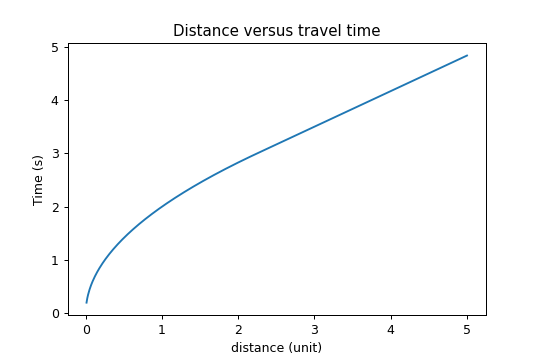

Text(0.5, 1.0, 'Distance versus travel time')

In [56]:
#Function to compute travel time
lv = 3.0                  # time to load/unload the vehicle
dv = 0.01                  # unit width clearance
vmaxv = 1.5              # maximum velocity of the vehicle
av = 1.0                  # acceleration/deceleration of the vehicle

t_amaxv = vmaxv / av  #acceleration/deceleration time
x_amaxv = 0.5 * av * t_amaxv**2 #distance travel in acceleration/deceleration time

t = list()
distance = list()

def traveltimevehicle(d):
    if d >= 2 * x_amaxv: #
        d_vmax = d - 2 * x_amaxv #distance traveled at vmax
        t_vmax = d_vmax / vmaxv #amount of time traveled at vmax
        t = (2 * t_amaxv + t_vmax); #total time traveling = traveling at vmax + acceleration & deceleration time
    else: #vehicle does not reach vmax
        t = 2*sqrt(d/av)
    
    return t
    

for i in range(round(5/dv)):
    d = dv * (i + 1) #distance to tote
    distance.append(d)
    t.append(traveltimevehicle(d))
    

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(distance,t)
ax.set_xlabel("distance (unit)")
ax.set_ylabel("Time (s)")
ax.set_title("Distance versus travel time")

As can be seen in the test code above the travel time first increases with the square root of the distance and after it reaches the maximal velocity it the travel time increases linearly with the distance.

In [57]:
# =================================
# Global vehicle variables
# =================================
lv = 3.0                  # time to load/unload the vehicle
dv = 0.5                  # unit width clearance
vmaxv = 1.5              # maximum velocity of the vehicle
av = 1.0                  # acceleration/deceleration of the vehicle

t_amaxv = vmaxv / av  #acceleration/deceleration time
x_amaxv = 0.5 * av * t_amaxv**2 #distance travel in acceleration/deceleration time
# =================================
# Vehicle definition
# =================================
@process
def Vehicle(env, c_in, c_out):
    while True:
        receiving = c_in.receive() 
        tote = yield env.execute(receiving) #waiting until something is received
        d = dv * (tote.column + 1) #distance to tote
        t = traveltimevehicle(d) #computing travel time
        yield env.timeout(t + 2*lv) #waiting traviling time + unloading and loading time  
        sending = c_out.send(receiving.entity) #sending out the received entity 
        yield env.execute(sending) 

# =================================
# Main
# =================================
def model(verbose : bool = True):
    env = Environment()
    a = Channel(env)
    b = Channel(env)
    c = Channel(env)
    G = Generator(env, a)
    D = Demand_Buffer(env, a,b)
    V = Vehicle(env, b, c)
    E = Exit(env, c, verbose)
    env.run(until=E)
    if verbose:
        print ("simulation has ended")

# =================================
# Main
# =================================
model()


  Mincolumn = 1, Maxcolumn = 55
  Mean throughput = 0.014390  Mean flowtime = 17.1356
simulation has ended


f. Confirm that your simulations produce the correct throughput and flow time.

Answer: ...



g.  Run your simulation at least 10 times. What is the range of outcomes for the mean throughput? Determine (roughly, by trial and error) the number of orders required to get good estimates for the flow time (first three non-zero digits are correct).

In [58]:
troughputanalysis(10)

Min troughput = 0.014083, Max troughput = 0.014507
95% confidence interval 0.014294 +/- 0.000089


Answer: ...



## 6.5 Exercise 5: Lift as two stage machine (5 points)
In the previous exercises we focussed on modeling a tier. In exercises 5-8 we focus on modeling the Buffer and Lift, starting with the Lift. We model the Lift as a machine, which repeatedly does the following: request a destination tier, move to the desired tier, receive a tote (first delay for `ll`, then communicate), move to the ground floor, deliver the tote (first delay for `ll`, then communicate). In this exercise we assume that moving to the desired tier takes 23.0 seconds, receiving the tote takes 2.0 seconds, moving to the ground floor again takes 23.0 seconds, and delivering the tote also takes 2.0 seconds. Note that, in this case, this implies that the tote should leave the Generator and enter the Lift 25.0 seconds after the Lift has received the destination tier. All of these times are assumed to be deterministic.

a. Assume that after 1.0 second the first tote arrives. Subsequently a tote arrives respectively 10.0, 100.0, and 100.0 seconds after the completion of sending its predecessor to the buffer. Make a lot-time-diagram indicating how long a newly generated job spends in the Generator, and spends in the Lift.

Answer: attach figure

b. Complete the simulation code in the template below, incorporating the actual time a vehicle requires for picking up a tote and delivering it to the buffer.

In [107]:
# =================================
# Tote definition
# =================================
@dataclass
class Tote:
    entrytime: float = 0
    tier: int = 0

# =================================
# Global Lift variables
# =================================
ll = 2.0  # time to load/unload the lift


# =================================
# Generator
# =================================
@process
def Generator(env, c_out, c_lift, verbose : bool = True):
    delays=[1.0, 10.0, 100.0, 100.0]
    while len(delays)>0:
        yield env.timeout(delays[0])
        delays = delays[1:]
        yield env.execute(c_lift.send(1))
        if verbose:
            print(f"Generator: Informed Lift to go to tier 1 at time {env.now:3.1f}");
        x = Tote(entrytime = env.now, tier = 1)
        yield env.execute(c_out.send(x))
        if verbose:
            print(f"Generator: Tote has completely left the Generator and entered"
                  f"the Lift at time {env.now:3.1f}")
    yield env.timeout(100.0)


# =================================
# Lift
# =================================
@process
def Lift(env, c_in, c_lift, c_out):
    while True:
        _tier = yield env.execute(c_lift.receive())
        yield env.timeout(23 + ll)

        _tote = yield env.execute(c_in.receive())
        yield env.timeout(23 + ll)

        yield env.execute(c_out.send(_tote))
    
# =================================
# Exit 
# =================================
@process
def Exit(env, c_in, verbose : bool = True):
    while True:
        _Tote = yield env.execute(c_in.receive())
        if verbose:
            print(f"Exit: Tote from tier {_Tote.tier} has completely left the Lift and has been received "
                  f"by the Exit at time {env.now:3.1f}");

# =================================
# Model
# =================================
def model(verbose : bool = True):
    env = Environment()
    a = Channel(env)  # for sending lots
    b = Channel(env)  # lift tier
    c = Channel(env)  # for sending lots
    G = Generator(env, a, b, verbose)
    L = Lift(env, a, b, c)
    E = Exit(env, c, verbose)
    env.run()
    if verbose:
        print ("simulation has ended")

# =================================
# Main
# =================================
model()

Generator: Informed Lift to go to tier 1 at time 1.0
Generator: Tote has completely left the Generator and enteredthe Lift at time 26.0
Generator: Informed Lift to go to tier 1 at time 51.0
Exit: Tote from tier 1 has completely left the Lift and has been received by the Exit at time 51.0
Generator: Tote has completely left the Generator and enteredthe Lift at time 76.0
Exit: Tote from tier 1 has completely left the Lift and has been received by the Exit at time 101.0
Generator: Informed Lift to go to tier 1 at time 176.0
Generator: Tote has completely left the Generator and enteredthe Lift at time 201.0
Exit: Tote from tier 1 has completely left the Lift and has been received by the Exit at time 226.0
Generator: Informed Lift to go to tier 1 at time 301.0
Generator: Tote has completely left the Generator and enteredthe Lift at time 326.0
Exit: Tote from tier 1 has completely left the Lift and has been received by the Exit at time 351.0
simulation has ended


c. Confirm that your simulations produce the correct results, i.e., in correspondence with your lot-time-diagram.

Answer: ...



## 6.6 Exercise 6: Buffer with only one tier (5 points)
In case we have only one tier, we could use a standard model for a finite buffer. However, keeping in mind that we need to model in the next exercise Level finite buffers in parallel where totes are served at a first-come-first-serve basis, we model the finite buffer slightly differently. We have a counter `n` which counts the number of jobs in the buffer, and we keep a list `xs` of totes that have arrived to the buffer. As long as the buffer contains less than `bc` totes, the buffer can receive jobs. Furthermore, if the buffer contains totes, it is possible to receive a request from the Lift (asking for which tier to move to, which is always 0 in this case). Additionally, if the buffer contains totes it is possible to send the first tote of the list `xs` to the lift.

a. Assume that after 1.0 second the first tote arrives. Subsequently, a tote arrives respectively 10.0, 100.0, and 100.0 seconds after the completion of sending its predecessor to the buffer. Make a lot-time-diagram indicating how long a newly generated job spends in the Generator, in the Buffer, and spends in the Lift.

Answer: attach figure

 b. Complete the simulation code in the template below, only the Generator and Buffer need to be redefined.

In [108]:
# =================================
# Global Lift variables
# =================================
ll = 2.0  # time to load/unload the lift
bc = 1    # buffer capacity

# =================================
# Generator
# =================================
@process
def Generator(env, c_out, verbose : bool = True):
    delays=[1.0, 10.0, 100.0, 100.0]
    while len(delays)>0:
        yield env.timeout(delays[0])
        delays = delays[1:]
        x = Tote(entrytime = env.now, tier = 0)
        yield env.execute(c_out.send(x))
        if verbose:
            print(f"Generator: sending tote to Buffer at time {env.now:3.1f}")
    yield env.timeout(100.0)

# =================================
# Buffer
# =================================
@process
def Buffer(env, c_in, c_out, c_lift):
    xs = [] # list of jobs
    n = 0
    while True:
        receiving = c_in.receive() if n < bc else None
        call_lift = c_lift.send(xs[0].tier) if len(xs) > 0 else None
        sending   = c_out.send(xs[0]) if len(xs)>0 else None
        
        yield env.select(receiving, call_lift, sending)

        if selected(receiving):
            x = receiving.entity
            xs = xs + [x]
            n = n+1
        
        if selected(call_lift):
            pass
        
        if selected(sending):
            xs = xs[1:]
            n = n - 1
            
# =================================
# Model
# =================================
def model(verbose : bool = True):
    env = Environment()
    a = Channel(env)  # for sending lots
    b = Channel(env)  # for sending lots
    c = Channel(env)  # for calling the lift
    d = Channel(env)  # for sending lots

    G = Generator(env, a, verbose)
    B = Buffer(env, a, b, c)
    L = Lift(env, b, c, d)
    E = Exit(env, d, verbose)
    env.run()
    if verbose:
        print ("simulation has ended")

# =================================
# Main
# =================================
model()

Generator: sending tote to Buffer at time 1.0
Generator: sending tote to Buffer at time 26.0
Exit: Tote from tier 0 has completely left the Lift and has been received by the Exit at time 51.0
Exit: Tote from tier 0 has completely left the Lift and has been received by the Exit at time 101.0
Generator: sending tote to Buffer at time 126.0
Exit: Tote from tier 0 has completely left the Lift and has been received by the Exit at time 176.0
Generator: sending tote to Buffer at time 226.0
Exit: Tote from tier 0 has completely left the Lift and has been received by the Exit at time 276.0
simulation has ended


c. Confirm that your simulations produce the correct results, i.e., in correspondence with your lot-time-diagram

Answer: ...



## Exercise 7: Buffer with multiple tiers (5 points)
We extend the buffer from the previous exercise to `Level` parallel finite buffers of size `bc` which are modelled as a list of `Level` counters. For this list we use the variable `n`. We keep a common list `xs` of totes that have arrived to all buffers. This list is used to determine which tote should be picked up first by the Lift. For each of the tiers it holds that if the buffer of that tier is not full yet, a tote can be received. Furthermore, if the buffer contains totes, it is possible to receive a request from the Lift asking for the tier to move to. Additionally, if the buffer contains totes it is possible to send the first tote of the list `xs` to the lift.

a. Consider two tiers, and assume that after `Tier` seconds the first tote arrives (for two tiers: after 0.0 for tier 0 and
after 1.0 for tier 1). Subsequently a tote arrives respectively 10.0, 100.0, and 100.0 seconds after the completion
of sending its predecessor to the buffer. Make a lot-time-diagram indicating how long a newly generated job
spends in which Generator, in the Buffer, and spends in the Lift.

Answer: attach figure

b. Complete the simulation code in the template below.

In [110]:
# =================================
# Global variables
# =================================
ll = 2.0  # time to load/unload the lift
bc = 1    # buffer capacity
Level = 2 # the number of tiers

# =================================
# Generator
# =================================
@process
def Generator(env, c_out, level):
    delays=[1.0*level, 10.0, 100.0, 100.0]
    while len(delays)>0:
        yield env.timeout(delays[0])
        delays = delays[1:]
        x = Tote(entrytime = env.now, tier = level)
        yield env.execute(c_out.send(x))
        print(f"Generator {level:d}: Sending tote to Buffer completed at "
              f"time {env.now:3.1f}")
    yield env.timeout(100.0)
    
# =================================
# Buffer
# =================================
@process
def Buffer(env, c_in, c_out, c_lift):
    xs = [] #FIFO totes
    n = [0] * Level #How many totes in each buffer
    
    while True:
        receiving = [c_in[Tier].receive() if n[Tier] < bc else None for Tier in range(Level)]
        call_lift = c_lift.send(xs[0].tier) if len(xs) > 0 else None
        sending = c_out.send(xs[0]) if len(xs) > 0 else None
        communications = receiving + [call_lift] + [sending]

        yield env.select(*communications)
        
        for Tier in range(Level):
            if selected(receiving[Tier]):
                x = receiving[Tier].entity
                xs = xs + [x]
                n[Tier] = n[Tier] + 1
        
            if selected(call_lift):
                pass
            
            if selected(sending):
                xs = xs[1:]
                n[Tier] = n[Tier] - 1

            
# =================================
# Model
# =================================
def model():
    env = Environment()
    a = [Channel(env) for tier in range(Level)] # a channel for each tier (sending lots)
    b = Channel(env)  # for sending lots
    c = Channel(env)  # for calling the lift
    d = Channel(env)  # for sending lots
    Gs = [Generator(env, a[tier], tier) for tier in range(Level)] 
    B = Buffer(env, a, b, c)
    L = Lift(env, b, c, d)
    E = Exit(env, d)
    env.run(until=1000000)
    print ("simulation has ended")

# =================================
# Main
# =================================
model()


Generator 0: Sending tote to Buffer completed at time 0.0
Generator 1: Sending tote to Buffer completed at time 1.0
Generator 0: Sending tote to Buffer completed at time 25.0
Generator 1: Sending tote to Buffer completed at time 25.0
Exit: Tote from tier 0 has completely left the Lift and has been received by the Exit at time 50.0
Exit: Tote from tier 0 has completely left the Lift and has been received by the Exit at time 100.0
Generator 0: Sending tote to Buffer completed at time 125.0
Generator 1: Sending tote to Buffer completed at time 125.0
Exit: Tote from tier 0 has completely left the Lift and has been received by the Exit at time 175.0
Generator 0: Sending tote to Buffer completed at time 225.0
Generator 1: Sending tote to Buffer completed at time 225.0
Exit: Tote from tier 0 has completely left the Lift and has been received by the Exit at time 275.0
simulation has ended


c. Confirm that your simulations produce the correct results, i.e., in correspondence with your lot-time-diagram

Answer: ...



## Exercise 8: Lift accurately modelled (5 points)

Assume that the Lift starts from the ground floor. If it has to go to level $i \in \{0, Level - 1\}$, it needs to travel a
distance $dl \cdot (i + 1)$, pick up the tote, travel back, and deliver the tote at the ground floor. For traveling the required
distance, the vehicle first goes with a constant acceleration `al` *m/s$^2$* until it reaches its maximum velocity `vmaxl`, then
it moves with this velocity and decelerates with a constant deceleration `al` to approach its destination tier. If the tier
is located too close to the ground floor, it is possible that the Lift will not reach its maximum speed.

a. From this information, (analytically) determine the time (in seconds) it takes the Lift to a given tier.

Answer: ...



b. Next, if loading and unloading a tote both take `ll` seconds, determine (analytically) the time it takes the Lift to pick up a tote from tier $i \in \{0, depth - 1\}$ and deliver it to the buffer.

Answer: ...



c. Consider two tiers, and assume that after Tier seconds the first tote arrives (for two tiers: after 0.0 for tier 0 and after 1.0 for tier 1). Subsequently a tote arrives respectively 10.0, 100.0, and 100.0 seconds after the completion of sending its predecessor to the buffer. Make a lot-time-diagram indicating how long a newly generated job spends in which Generator, in the Buffer, and spends in the Lift.

Answer: attach figure

d. Complete the simulation code in the template below.

In [ ]:
# =================================
# Global variables
# =================================
ll = 2.0        # time to load/unload the lift
bc = 1          # buffer capacity
Level = 2       # the number of tiers
dl = 0.8        # unit height clearance
vmaxl = 5.0     # maximum velocity of lift
al = 7.0        # acceleration/deceleration of lift

# =================================
# Lift definition
# =================================
@process
def Lift(env, c_in, c_lift, c_out):
    #.....
        
        
# =================================
# Model
# =================================
def model():
    env = Environment()
    a = [Channel(env) for Tier in range(Level)] # a channel for each tier, each sending totes
    b = Channel(env)  # for sending totes
    c = Channel(env)  # for calling the lift
    d = Channel(env)  # for sending totes

    Gs = [Generator(env, a[Tier], Tier) for Tier in range(Level)] 
    B = Buffer(env, a, b, c)
    L = Lift(env, b, c, d)
    E = Exit(env, d)
    env.run()
    print ("simulation has ended")

    
# =================================
# Main
# =================================
model()

e. Confirm that your simulations produce the correct results, i.e., in correspondence with your lot-time-diagram

Answer: ...



## 6.9 Exercise 9: Entire system (10 points)
In the previous exercises we developed and tested each process individually. Now it is time to combine all processes into one model.

a. Determine the (total) arrival rate of orders for a system with `Level` tiers, where for each tier orders arrive with a mean inter arrival time of `arrive`.

Answer: ...



b. Complete the simulation code in the template below by substituting the code for the processes as you derived in Exercises 1, 2, 4, 7, and 8. Note that the type tote has been extended in comparison with Exercise 1, so one line of code extra is required in the Generator process to include the tier.

In [ ]:
# =================================
# Tote
# =================================
@dataclass
class Tote:
    entrytime: float = 0.0
    column: int = 0
    tier: int  = 0
        
# =================================
# Global variables
# =================================
lv = 3.0                   # time to load/unload the vehicle
dv = 0.5                   # unit width clearance
vmaxv = 1.5                # maximum velocity of the vehicle
av = 1.0                   # acceleration/deceleration of the vehicle
ll = 2.0                   # time to load/unload the lift
dl = 0.8                   # unit height clearance
vmaxl = 5.0                # maximum velocity of lift
al = 7.0                   # acceleration/deceleration of lift
bc = 1                     # buffer capacity
arrive = 70.0              # inter arrival time of requests
Level = 9                  # the number of tiers
depth  = 55                # the number of columns
number_of_orders = 20000  # the number of orders to process

# =================================
# Generator
# =================================
@process
def Generator(env, c_out, Tier):
    #.....
    #.....
    while True:
        x = Tote()
        x.entrytime = env.now
        x.column = #.....
        x.tier = #.....
        yield env.execute(c_out.send(x))
        delay = #.....
        yield env.timeout(delay)
        
        
# =================================
# Demand Buffer
# =================================
@process
def Demand_Buffer(env, c_in, c_out):
    xs = [] # list of totes
    #.....
                 
# =================================
# Vehicle
# =================================
@process
def Vehicle(env, c_in, c_out):
    #.....

# =================================
# Buffer
# =================================
@process
def Buffer(env, c_in, c_out, c_lift):
    xs = []
    n = [0] * Level
    while True:
        receiving = [c_in[Tier].receive() if n[Tier] < bc else None for Tier in range(Level) ]
        call_lift = c_lift.send(xs[0].tier) if len(xs) > 0 else None
        sending = c_out.send(xs[0]) if len(xs) > 0 else None
        communications = receiving + [call_lift] + [sending]

        yield env.select(*communications)

        for Tier in range(Level):
            if selected(receiving[Tier]):
                x = receiving[Tier].entity
                xs = xs + [x]
                n[Tier] = n[Tier] + 1

        if selected(call_lift):
            pass

        if selected(sending):
            #.....

            
# =================================
# Lift
# =================================
@process
def Lift(env, c_in, c_lift, c_out):
    #.....
        
# =================================
# Exit
# =================================
@process
def Exit(env, c_in):
    mphi = 0.0
    for i in range(1, number_of_orders + 1):
        x = yield env.execute(c_in.receive())
        mphi = (i - 1) / i * mphi + (env.now - x.entrytime) / i
        mthi = i/env.now
    return mphi, mthi 
            
        
# =================================
# GDV
# =================================
def GDV(env, c_out, Tier):
    a = Channel(env)  # for sending totes
    b = Channel(env)  # for sending totes
    G = Generator(env, a, Tier)
    D = Demand_Buffer(env, a,b)
    V = Vehicle(env, b, c_out)
        

# =================================
# Model
# =================================
def model():
    env = Environment()
    c = [Channel(env) for Tier in range(Level)] # a channel for each tier, each sending totes
    d = Channel(env)  # for sending totes
    e = Channel(env)  # for calling the lift
    f = Channel(env)  # for sending totes
    GDVs = [ GDV(env, c[Tier], Tier)  for Tier in range(Level) ] 
    B = Buffer(env, c, d, e)
    L = Lift(env, d, e, f)
    E = Exit(env, f)
    env.run(until=E)
    mph, mth = E.value
    print(f"--- Mean throughput = {mth:8.6f}; Mean flowtime = {mph:6.4f} ---")
    return mph, mth

# =================================
# Main
# =================================
mph, mth = model()

c. Verify if the throughput in your simulations matches with the start rate you determined. Verify that totes reach the exit from each tier. Also verify that totes are generated from each column.

Answer: ...



d. Run your simulation 30 times, and record for each run the resulting average throughput and average flow time.
Determine the mean and the standard deviation of both the average throughput and the average flow time for these 30 simulations. Finally, determine a 95% confidence interval for both the average throughput and the average flow time.

Answer: ...



## 6.10 Exercise 10: Effect of buffer capacity (10 points)
Via computer simulation analyze the impact of the buffer capacity on the throughput and flow time (choose values of `bc` as 1,2,3,200). For each setting, run your simulations 30 times and determine both mean and standard deviation of the resulting average throughput and average flow time for these 30 simulations, as well as 95% confidence intervals.

Answer: ...



## 6.11 Exercise 11: Looking for the best layout (30 points)
Via computer simulation consider 6 different scenarios (see the table below) that correspond to different layouts of the
storage facility with a total capacity of 500 totes with different number of tiers and columns.

| Scenario | 1 | 2 | 3 | 4| 5 | 6 |
| - | - | - | - | - | - | - |
| Level |  2 | 5 | 10 | 20 | 25 | 50 |
| Depth | 250 | 100 | 50 | 25 | 20 | 10 |

In order to obtain an answer to the questions below: for each scenario, run your simulations 30 times and determine both mean and standard deviation of the resulting average throughput and average flow time for these 30 simulations, as well as 95% confidence intervals.

a. For each scenario, determine by means of simulation the maximal throughput.

Answer: ...



b. Assume a required throughput of 6 totes per minute. Compare the resulting flow time for each feasible scenario.

Answer: ...



c. Based on your outcomes, select a layout that seems the best for you. If necessary, introduce other performance indicators and modify the code accordingly. The report on this step should contain an argument to select the best layout.

Answer: ...



## References
[1] G. Marchet, M. Melanci, S. Perotti and E. Tappia, "Analytical model to estimate performance of autonomous vehicle storage and retrieval systems for product totes", International Journal of Production Research, vol. 50(24), 7134-7148, 2012.